In [1]:
import pandas as pd
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.shape

(200, 5)

In [3]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

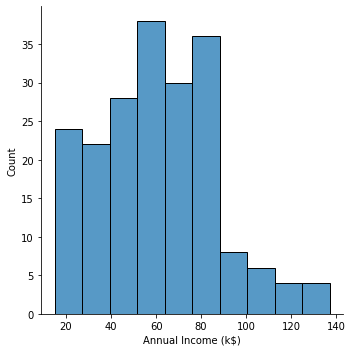

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(df['Annual Income (k$)'])
plt.show()

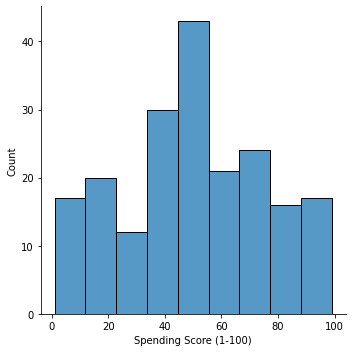

In [5]:
sns.displot(df['Spending Score (1-100)'])
plt.show()

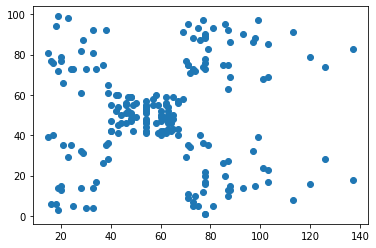

In [6]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.show()

In [7]:
# Consider the value of x

x = df[['Annual Income (k$)','Spending Score (1-100)']].values

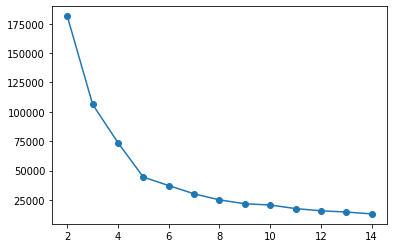

In [8]:
from sklearn.cluster import KMeans

sse = []
for i in range(2,15):
  kmeans = KMeans(n_clusters=i, random_state=0).fit(x)
  sse.append(kmeans.inertia_)

plt.plot(range(2,15),sse)
plt.scatter(range(2,15),sse)
plt.show()

In [9]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(x)
y = kmeans.predict(x)
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [10]:
x[y==0,0] # Cluster Group No. , Column No.

array([ 70,  71,  71,  73,  73,  74,  75,  77,  77,  78,  78,  78,  78,
        78,  78,  79,  81,  85,  86,  87,  87,  87,  88,  88,  93,  97,
        98,  99, 101, 103, 103, 113, 120, 126, 137])

In [11]:
import numpy as np
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([35, 81, 39, 22, 23]))

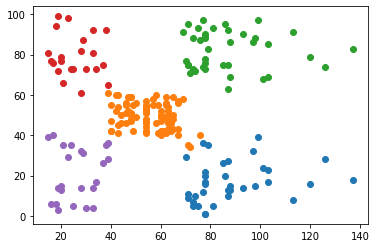

In [12]:
for i in range(5) :
  plt.scatter(x[y==i,0],x[y==i,1])
plt.show()

In [14]:
# Evaluation of Clustering

In [15]:
# Silhouette score

from sklearn.metrics import silhouette_score
silhouette_score(x,y)

0.553931997444648

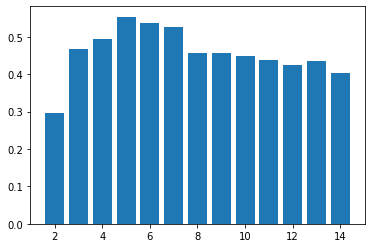

In [21]:
s_list = []
for i in range(2,15):
  kmeans = KMeans(n_clusters=i, random_state=0).fit(x)
  y = kmeans.predict(x)
  s_list.append(silhouette_score(x,y))

plt.bar(range(2,15),s_list)
plt.show()

In [ ]:
# Hence the value of k is 5 only (we get the best accuracy at k=5)